In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('Titanic-Dataset (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'],inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
# df['Sex']=df['Sex'].map({'male':0,'female':1})

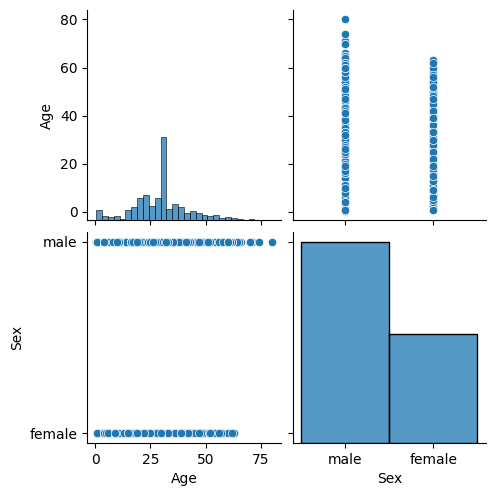

In [28]:
sns.pairplot(df,vars=['Age','Sex'])
plt.show()


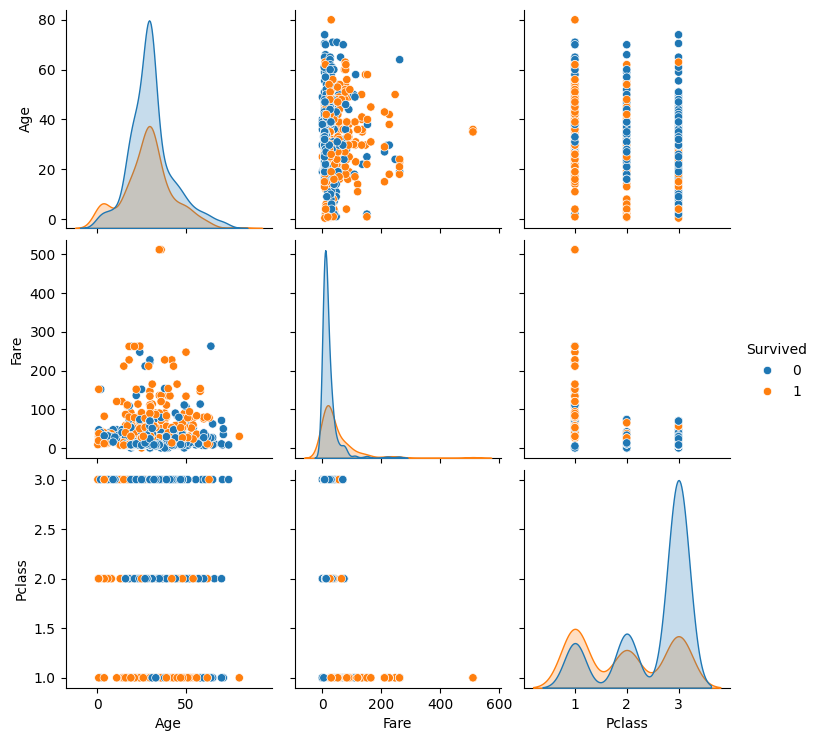

In [29]:
sns.pairplot(df, vars=['Age', 'Fare', 'Pclass'], hue='Survived')
plt.show()

In [30]:
survive_rate=df['Survived'].mean()
print(f"Overall survival rate : {survive_rate*100:.2f}")

Overall survival rate : 38.38


In [31]:
df['Survived'].value_counts().sum()

np.int64(891)

In [32]:
survive_by_gender=df.groupby('Sex')['Survived'].mean()
for gender,rate in survive_by_gender.items():
  print(f"Survival rate for {gender} is {rate*100:.2f}")


Survival rate for female is 74.20
Survival rate for male is 18.89


In [33]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [34]:
print("Survival rate by Gender and Class:")
print(df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean'))


Survival rate by Gender and Class:
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [35]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [36]:
print("Survival rate by Embarked:")
print(df.pivot_table(index="Sex",columns='Embarked',values='Survived',aggfunc='mean'))

Survival rate by Embarked:
Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.692683
male      0.305263  0.073171  0.174603


In [37]:
print("Age stats by Survival")
print(df.groupby('Survived')['Age'].describe())

Age stats by Survival
          count       mean        std   min   25%        50%   75%   max
Survived                                                                
0         549.0  30.415100  12.457370  1.00  23.0  29.699118  35.0  74.0
1         342.0  28.549778  13.772498  0.42  21.0  29.699118  35.0  80.0


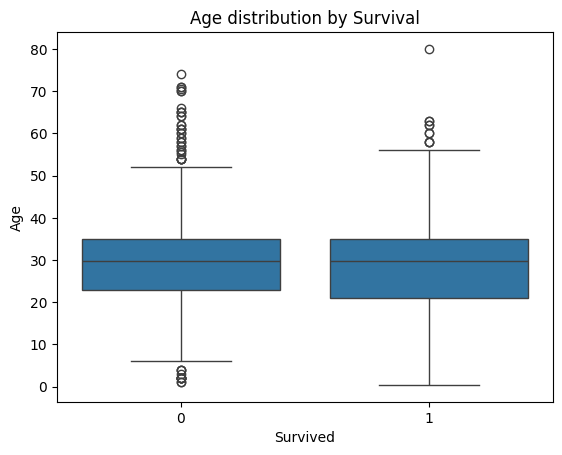

In [38]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age distribution by Survival")
plt.show()

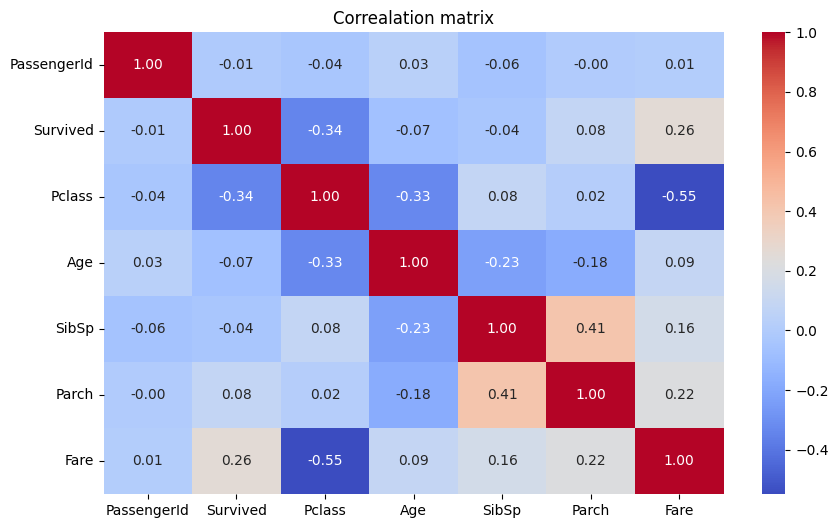

In [39]:
numeric_df=df.select_dtypes(include='number')
correalation=numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correalation,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correalation matrix")
plt.show()

/tmp/ipython-input-40-1471172492.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Age Group', columns='Sex', values='Survived')


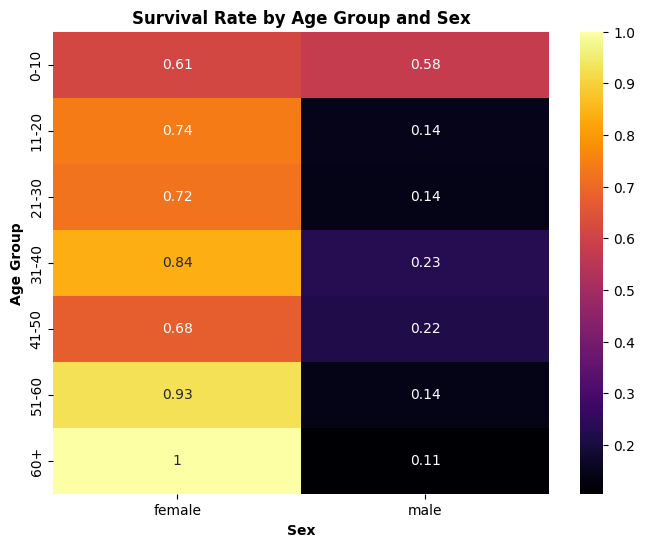

In [40]:
df['Age Group']=pd.cut(df['Age'],bins=[0,10,20,30,40,50,60,80],labels=['0-10','11-20','21-30','31-40','41-50','51-60','60+'])

pivot = df.pivot_table(index='Age Group', columns='Sex', values='Survived')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='inferno')
plt.title("Survival Rate by Age Group and Sex",weight='bold')
plt.xlabel("Sex",weight='bold')
plt.ylabel("Age Group",weight='bold')
plt.show()

/tmp/ipython-input-41-1429995919.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group')


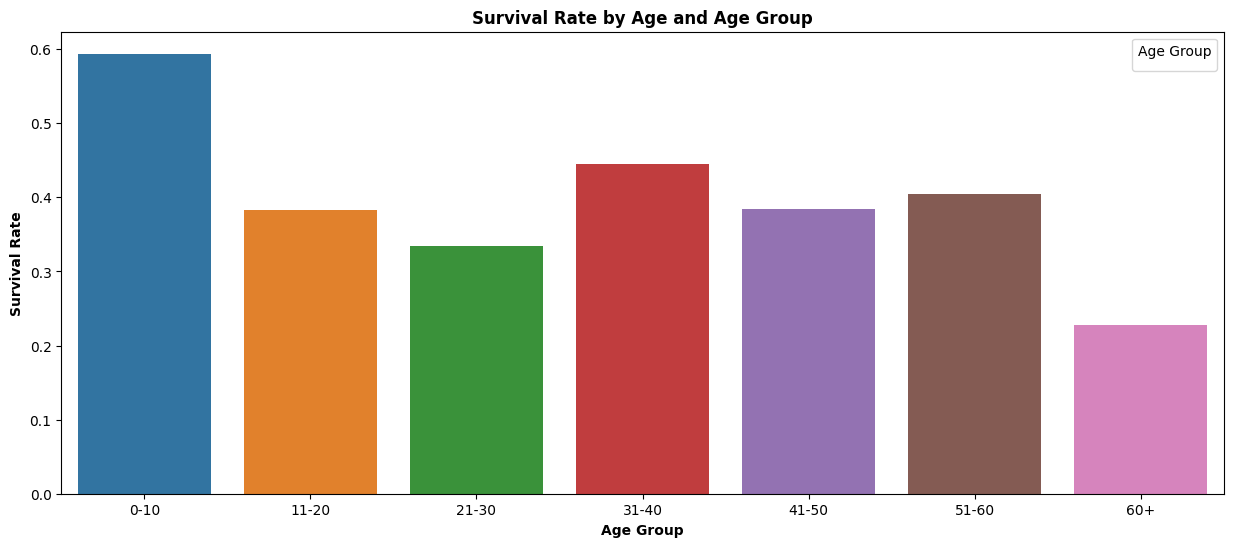

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(data=df, x='Age Group', y='Survived', hue='Age Group', errorbar=None)
plt.title("Survival Rate by Age and Age Group", weight='bold')
plt.xlabel("Age Group", weight='bold')
plt.ylabel("Survival Rate", weight='bold')
plt.legend(title='Age Group')
plt.show()
